# EDA of Supermarket Sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available \u2013 Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import calmap
from pandas_profiling import ProfileReport

sns.set_style("darkgrid", {"axes.facecolor": ".9"})


print('Libraries imported')

Libraries imported


In [2]:
df = pd.read_csv('data.csv')
df.head(-3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
# Setting date as index is more convenient
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head(-3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,20:46,Ewallet,116.06,4.761905,5.8030,8.8
2019-02-22,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,18:35,Ewallet,174.90,4.761905,8.7450,6.6
2019-02-18,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,11:40,Ewallet,60.95,4.761905,3.0475,5.9


#### Univariate Analysis

<Figure size 1584x1008 with 0 Axes>

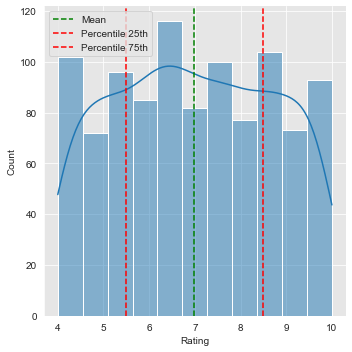

In [5]:
plt.figure(figsize = (22,14))
sns.displot(df['Rating'], kde = True)
plt.axvline(x = np.mean(df['Rating']), c = 'green', ls = '--', label = 'Mean')
plt.axvline(x = np.percentile(df['Rating'], 25), c = 'red', ls = '--', label = 'Percentile 25th')
plt.axvline(x = np.percentile(df['Rating'], 75), c = 'red', ls = '--', label = 'Percentile 75th')
plt.legend()
plt.show()

* Not every one of them is uniformly distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232046194F0>,
      dtype=object)

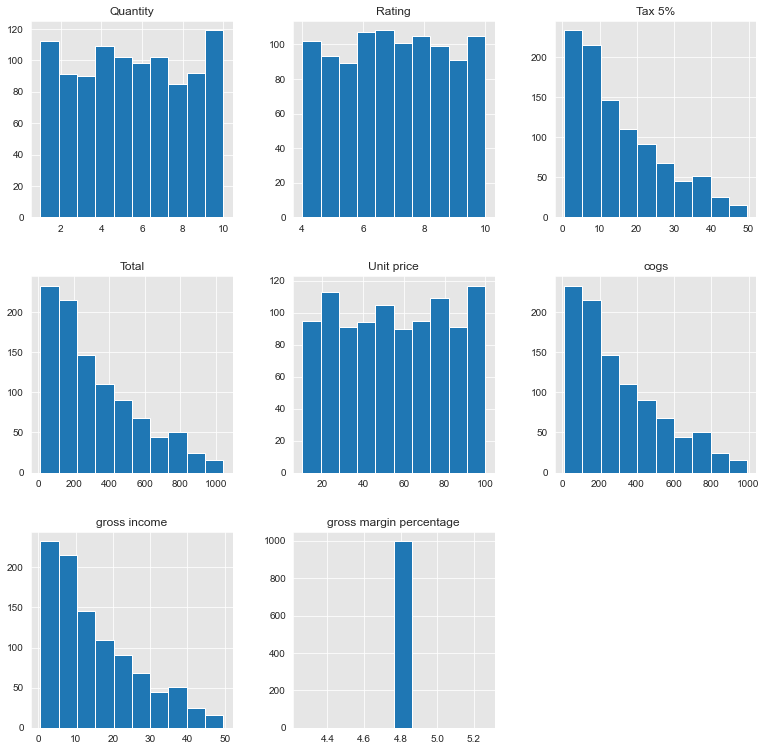

In [6]:
df.hist(figsize= (13,13))

A    340
B    332
C    328
Name: Branch, dtype: int64


Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


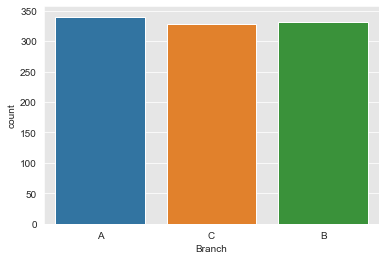

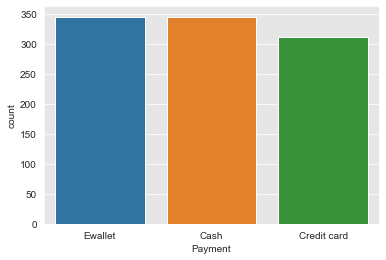

In [7]:
sns.countplot(data = df, x = 'Branch')
plt.figure()
sns.countplot(data = df, x = 'Payment')

print(df['Branch'].value_counts())
print('\n')
print(df['Payment'].value_counts())

#### Bivariate Analysis

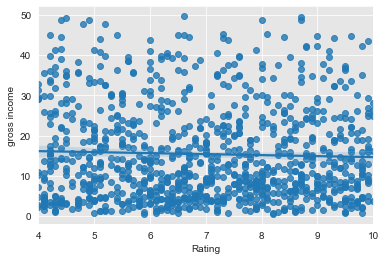

In [8]:
sns.regplot(data = df, x = 'Rating', y = 'gross income')

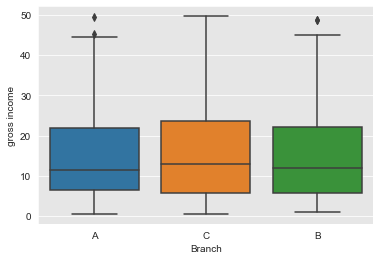

In [9]:
sns.boxplot(data = df, x = 'Branch', y = 'gross income')

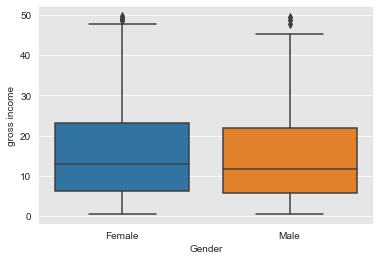

In [10]:
sns.boxplot(data = df, x = 'Gender', y = 'gross income')

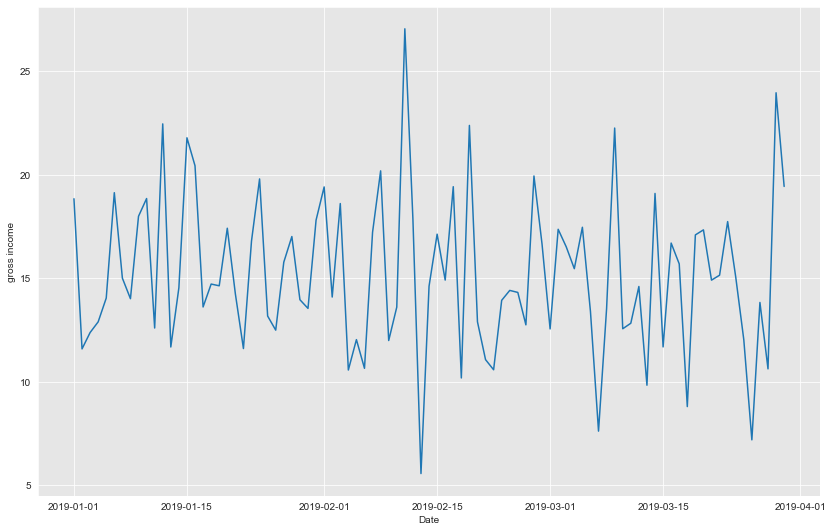

In [11]:
plt.figure(figsize = (14,9))
sns.lineplot(x = df.groupby(df.index).mean().index, y =df.groupby(df.index).mean()['gross income'])

#### Duplicate Rows and Missing Values

In [12]:
df[df.duplicated() == True] # no duplicates

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,


In [13]:
# df.drop_duplicates in case if you have them

In [14]:
df.isna().sum() # no missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [15]:
# df.fillna(df.mean()) --> fills only numeric columns
# df.fillna(df.model.iloc[0]) --> fills categorical with their mode

In [16]:
# dataset = pd.read_csv('data.csv')
# rep = ProfileReport(dataset)
# rep

#### Correlation Analysis

In [17]:
np.round(df.corr(), 3)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000,0.011,0.634,0.634,0.634,-0.0,0.634,-0.009
Quantity,0.011,1.000,0.706,0.706,0.706,-0.0,0.706,-0.016
Tax 5%,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
Total,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
cogs,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
gross margin percentage,-0.000,-0.000,0.000,0.000,0.000,1.0,0.000,0.000
gross income,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
Rating,-0.009,-0.016,-0.036,-0.036,-0.036,0.0,-0.036,1.000


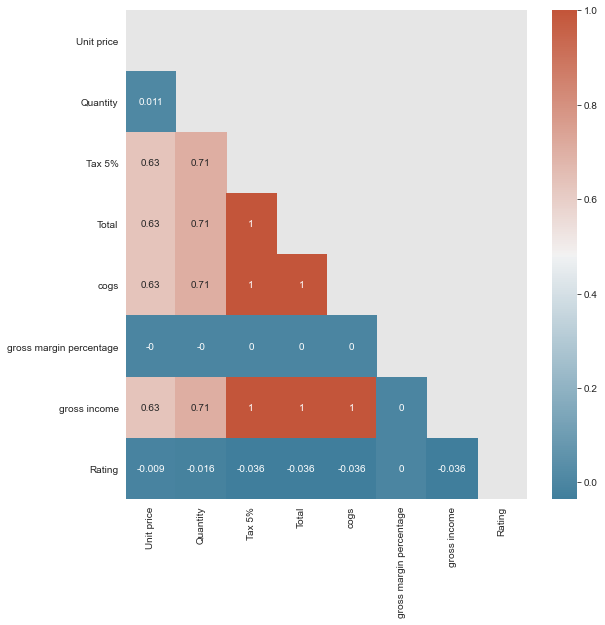

In [18]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize = (9,9))
sns.heatmap(np.round(df.corr(), 3), annot = True, mask = mask, cmap = cmap)